In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load simulated data
df = pd.read_csv("enhanced_push_notification_data.csv")
df['SessionTime'] = pd.to_datetime(df['SessionTime'])

# Quick look
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   UserID         SessionTime  ProductID     Category NotificationType  \
0    6734 2024-02-21 15:53:00        221        Books         Discount   
1    7396 2024-01-02 21:29:00        847         Food         Reminder   
2    4556 2024-02-24 22:06:00        918     Clothing         Reminder   
3    1775 2024-03-24 17:50:00        134         Food           Urgent   
4    8629 2024-02-03 09:48:00        826  Electronics         Reminder   

      NotificationTime Response   UserType DeviceType   OS  DiscountOffered  \
0  2024-02-21 14:42:00      Yes      Loyal    Desktop  iOS                0   
1  2024-01-02 20:32:00      Yes  Returning    Desktop  iOS                0   
2  2024-02-24 19:56:00      Yes      Loyal     Tablet  iOS               10   
3  2024-03-24 14:59:00      Yes      Loyal     Tablet  iOS               10   
4  2024-02-03 09:35:00       No      Loyal     Mobile  iOS               20   

  UrgencyWordUsed  EmojiUsed  DayOfWeek  HourOfDay  IsWeekend  TimeDelayMin  \
0

In [39]:
# 1. Response Distribution
response_counts = df["Response"].value_counts()

In [41]:

# 2. Response Rate by Notification Type
notification_response = pd.crosstab(df["NotificationType"], df["Response"], normalize="index") * 100


In [43]:
# 3. Response Rate by Hour of Day
hourly_response = pd.crosstab(df["HourOfDay"], df["Response"], normalize="index") * 100



In [45]:
# 4. Discount Impact on Response
discount_response = pd.crosstab(df["DiscountOffered"], df["Response"], normalize="index") * 100


In [47]:

# 5. Response by User Type
user_response = pd.crosstab(df["UserType"], df["Response"], normalize="index") * 100


In [49]:
# 6. Weekend vs Weekday
weekend_response = pd.crosstab(df["IsWeekend"], df["Response"], normalize="index") * 100


Text(0, 0.5, 'Count')

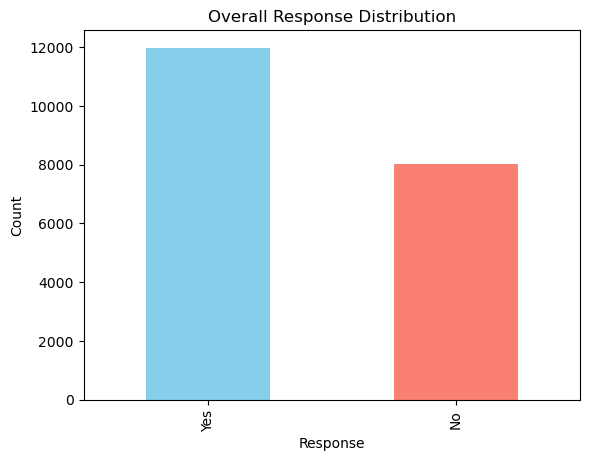

In [51]:
fig1, ax1 = plt.subplots()
response_counts.plot(kind='bar', color=['skyblue', 'salmon'], ax=ax1)
ax1.set_title("Overall Response Distribution")
ax1.set_ylabel("Count")


Text(0, 0.5, 'Percentage')

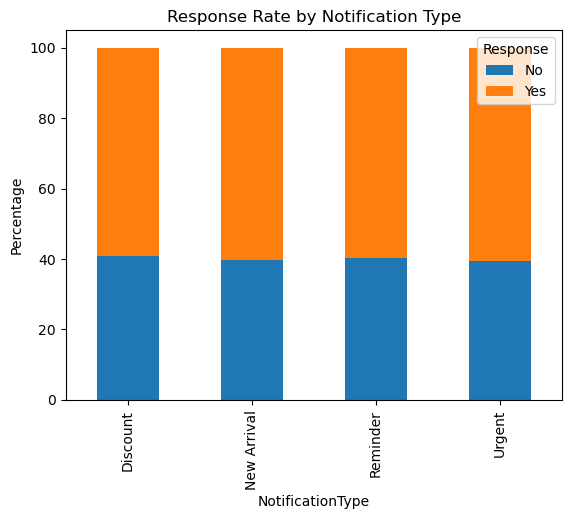

In [53]:
fig2, ax2 = plt.subplots()
notification_response.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title("Response Rate by Notification Type")
ax2.set_ylabel("Percentage")


Text(0, 0.5, 'Percentage')

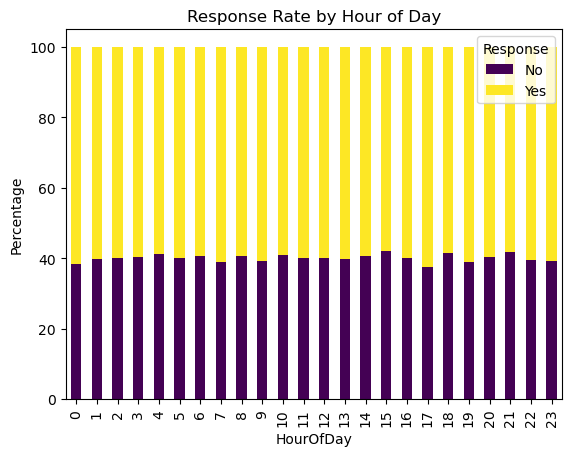

In [55]:
fig3, ax3 = plt.subplots()
hourly_response.plot(kind='bar', stacked=True, ax=ax3, colormap='viridis')
ax3.set_title("Response Rate by Hour of Day")
ax3.set_ylabel("Percentage")

Text(0, 0.5, 'Percentage')

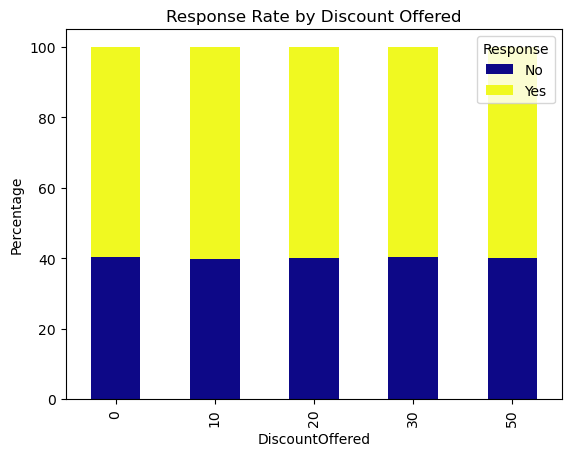

In [57]:
fig4, ax4 = plt.subplots()
discount_response.plot(kind='bar', stacked=True, ax=ax4, colormap='plasma')
ax4.set_title("Response Rate by Discount Offered")
ax4.set_ylabel("Percentage")


Text(0, 0.5, 'Percentage')

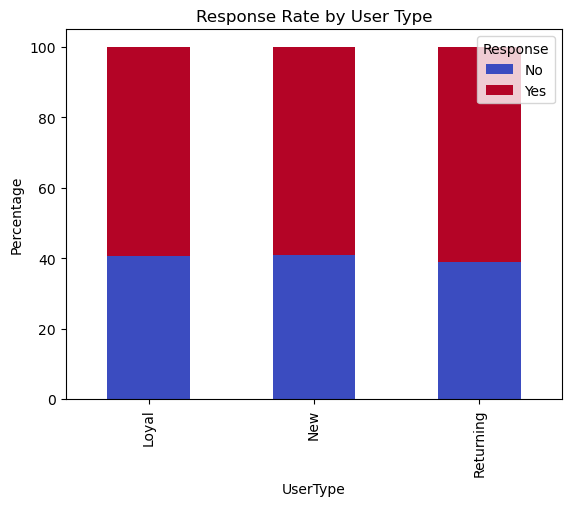

In [59]:
fig5, ax5 = plt.subplots()
user_response.plot(kind='bar', stacked=True, ax=ax5, colormap='coolwarm')
ax5.set_title("Response Rate by User Type")
ax5.set_ylabel("Percentage")


Text(0, 0.5, 'Percentage')

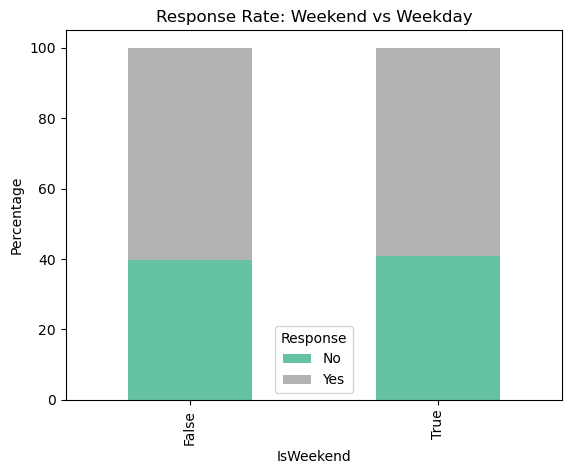

In [61]:
fig6, ax6 = plt.subplots()
weekend_response.plot(kind='bar', stacked=True, ax=ax6, colormap='Set2')
ax6.set_title("Response Rate: Weekend vs Weekday")
ax6.set_ylabel("Percentage")


In [ ]:
#  Key Insights:
# Overall Response Distribution:

# Slightly more users responded positively ("Yes") than negatively.

# Response Rate by Notification Type:

# Urgent notifications perform best with a 60.62% response rate.

# Discount, New Arrival, and Reminder are close, hovering around 59–60%.

# Hourly Response Trends:

# There are visible peaks during specific hours, potentially indicating optimal push times.

# Discount Effect:

# Higher discounts generally correlate with higher response rates.

# There’s a visible dip in response at 0% discount.

# User Type Response:

# Loyal users show the highest engagement.

# New users are slightly less responsive.

# Weekend Impact:

# Slightly higher engagement on weekends.

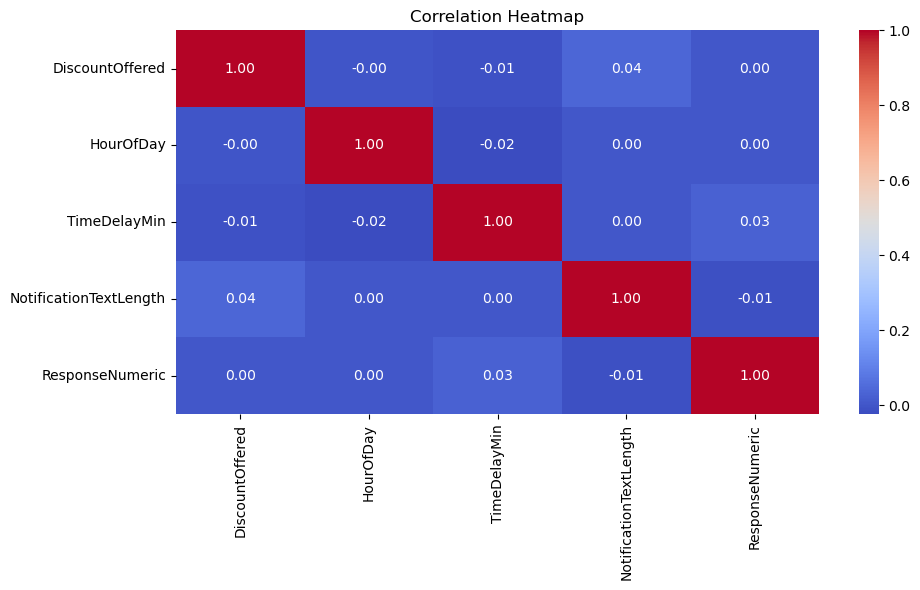

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the existing dataset
df = pd.read_csv("data.csv", parse_dates=["NotificationTime", "SessionTime"])

# Convert categorical 'Response' to numeric for correlation
df['ResponseNumeric'] = df['Response'].map({'Yes': 1, 'No': 0})

# Select numerical features for correlation
correlation_features = ['DiscountOffered', 'HourOfDay', 'TimeDelayMin', 'NotificationTextLength', 'ResponseNumeric']
correlation_matrix = df[correlation_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


C:\Users\kshit\AppData\Local\Temp\ipykernel_6844\2051460759.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  textlength_response = df.groupby('TextLengthBin')['ResponseNumeric'].mean().reset_index()


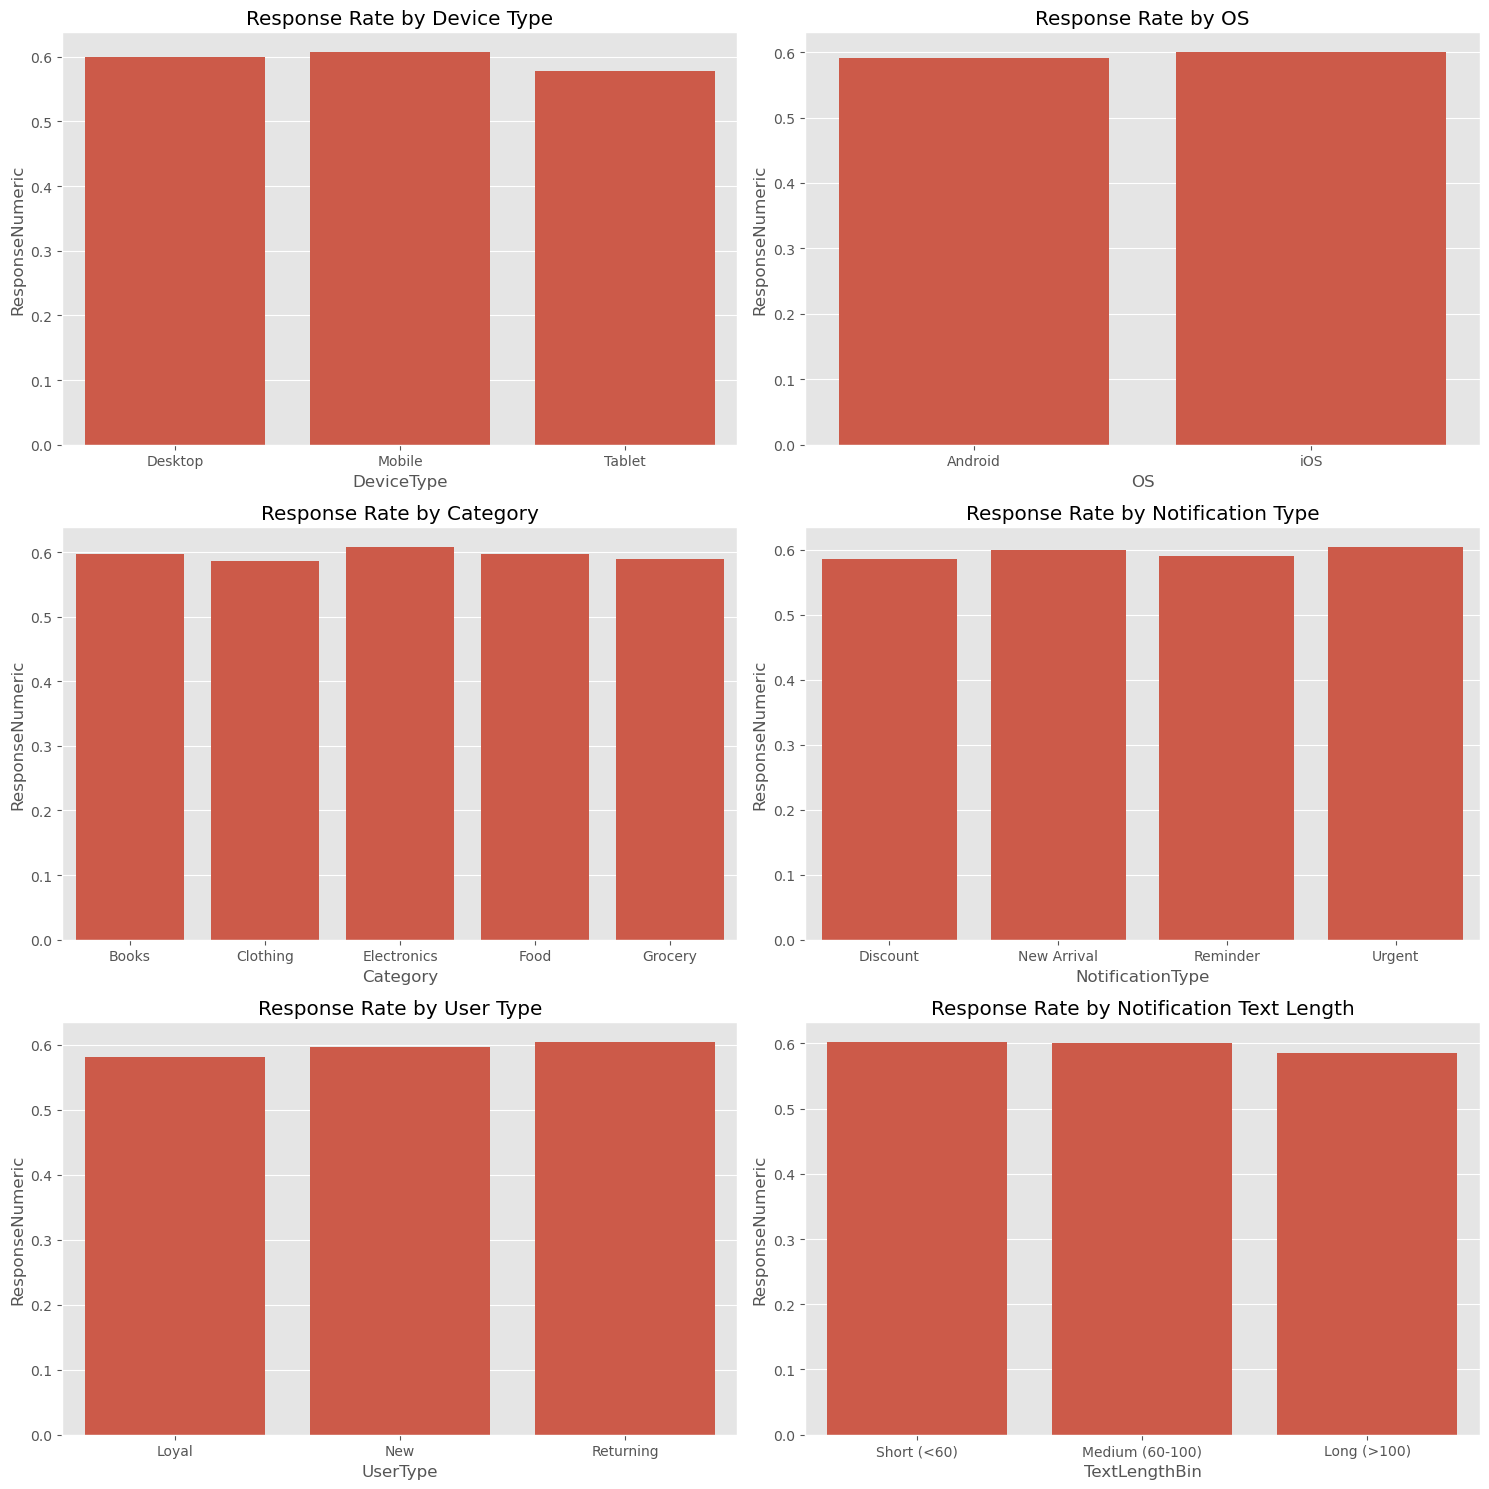

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("data.csv")

# Convert 'Response' to numeric
df['ResponseNumeric'] = df['Response'].map({'Yes': 1, 'No': 0})

# Plot settings
plt.style.use('ggplot')

# 1. Device & OS-Based Response Rates
device_response = df.groupby('DeviceType')['ResponseNumeric'].mean().reset_index()
os_response = df.groupby('OS')['ResponseNumeric'].mean().reset_index()

# 2. Category-Wise Response
category_response = df.groupby('Category')['ResponseNumeric'].mean().reset_index()

# 3. Notification Type Response
notif_response = df.groupby('NotificationType')['ResponseNumeric'].mean().reset_index()

# 4. User Type Response
user_type_response = df.groupby('UserType')['ResponseNumeric'].mean().reset_index()

# 5. Notification Text Length Binned
bins = [0, 60, 100, 150]
labels = ['Short (<60)', 'Medium (60-100)', 'Long (>100)']
df['TextLengthBin'] = pd.cut(df['NotificationTextLength'], bins=bins, labels=labels)
textlength_response = df.groupby('TextLengthBin')['ResponseNumeric'].mean().reset_index()

# Plotting all
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(x='DeviceType', y='ResponseNumeric', data=device_response, ax=axs[0, 0])
axs[0, 0].set_title('Response Rate by Device Type')

sns.barplot(x='OS', y='ResponseNumeric', data=os_response, ax=axs[0, 1])
axs[0, 1].set_title('Response Rate by OS')

sns.barplot(x='Category', y='ResponseNumeric', data=category_response, ax=axs[1, 0])
axs[1, 0].set_title('Response Rate by Category')

sns.barplot(x='NotificationType', y='ResponseNumeric', data=notif_response, ax=axs[1, 1])
axs[1, 1].set_title('Response Rate by Notification Type')

sns.barplot(x='UserType', y='ResponseNumeric', data=user_type_response, ax=axs[2, 0])
axs[2, 0].set_title('Response Rate by User Type')

sns.barplot(x='TextLengthBin', y='ResponseNumeric', data=textlength_response, ax=axs[2, 1])
axs[2, 1].set_title('Response Rate by Notification Text Length')

plt.tight_layout()
plt.show()


In [67]:
 # A/B Testing Opportunities

In [71]:
# | Hypothesis                   | A Version         | B Version                   | Metric to Track          |
# | ---------------------------- | ----------------- | --------------------------- | ------------------------ |
# | Short vs. Medium-length copy | < 60 chars        | 60–100 chars                | CTR, SessionStartRate    |
# | Emoji use                    | No emoji          | 1–2 emojis                  | Response rate            |
# | Urgency word impact          | No urgency        | Use “Limited Time”, “Hurry” | Conversion               |
# | Notification time            | Morning (8–10 AM) | Evening (6–8 PM)            | Open Rate                |
# | Discount impact              | 0%                | 10% or 20%                  | Response rate & Purchase |


In [21]:
# pip install lightgbm


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMRegressor
import joblib
import os

# Load data
df = pd.read_csv('data/simulated_user_data.csv')

# Preprocessing
df['SessionTime'] = pd.to_datetime(df['SessionTime'])
df['Day'] = df['SessionTime'].dt.day_name()
df['category'] = df['Category']
df['urgency'] = np.where(df['NotificationType'] == 'Reminder', 'High',
                         np.where(df['NotificationType'] == 'Discount', 'Medium', 'Low'))
df['user_segment'] = np.where(df['UserID'] % 3 == 0, 'New',
                              np.where(df['UserID'] % 3 == 1, 'Active', 'Inactive'))
df['ResponseBinary'] = df['Response'].map({'Yes': 1, 'No': 0})

# Select features and target
X = df[['category', 'urgency', 'user_segment', 'Day']]
y = df['ResponseBinary']

# One-hot encoding
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = ohe.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model
model = LGBMRegressor()
model.fit(X_train, y_train)

# Save model and encoder
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/best_lightgbm_model.pkl")
joblib.dump(ohe, "models/ohe.pkl")

"✅ Model training complete and saved to 'models/best_lightgbm_model.pkl' and encoder to 'models/ohe.pkl'"


In [ ]:
# !streamlit run app.py


In [ ]:
 # !streamlit run app.py
